# Прогнозирование оттока клиента Банка

## Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

**Цель проекта:**

Построить модель с предельно большим значением F1-меры, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

## Описание данных
**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly.subplots import make_subplots


#другое
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')

#загрузка файлов с диска
from google.colab import drive
drive.mount('/content/drive')

#ML
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

Mounted at /content/drive


## Загрузка и предобработка данных

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/4_churn_rate.csv')
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6105,6106,15605134,Bond,617,France,Female,34,0.0,131244.65,2,1,0,183229.02,0
4153,4154,15664001,Riddle,695,Germany,Female,53,NaN,95231.91,1,0,0,70140.80,1
8051,8052,15697801,Sokolova,605,Germany,Female,56,1.0,74129.18,2,1,1,62199.78,1
5607,5608,15771728,Mackenzie,641,Germany,Male,41,7.0,104405.54,3,1,0,17384.21,0
1953,1954,15675190,Chia,623,France,Male,21,10.0,0.00,2,0,1,135851.30,0
4207,4208,15732774,Marchesi,656,France,Male,37,7.0,112291.34,1,1,0,153157.97,0
8140,8141,15572022,Han,605,France,Female,36,6.0,0.00,1,0,1,690.84,0
3904,3905,15566633,Freeman,698,Germany,Male,55,8.0,155059.10,2,1,1,144584.29,0
9477,9478,15592104,Lane,655,France,Female,41,5.0,0.00,1,0,0,36548.00,1
3902,3903,15720305,Power,591,Spain,Female,40,1.0,86376.29,1,0,1,136767.16,1


In [3]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


> Заметим, что:
>
> 1. датафрейм содержит как качественные (например, Geography, Gender и др.), так и количественные признаки (Age, Balance и др.)
датафрейм содержит 13 признаков (3 из них — качественные, а 10 — количественные) и 10000 объектов;
2. есть признаки, которые в рамках нашей задачи не играют важной роли, их можно будет удалить и таким образом облегчить работу будущей модели. К таким признакам можно отнести следующие признаки: RowNumber, CustomerId и Surname
3. датафрейм содержит пропуски в столбце Tenure. Можно предположить, что пропуски появились по одной из этих причин:
 - клиент оставил графу пустой, так как он только недавно стал клиентом банка (в таком случае пропуски можно заполнить 0)
 - клиент просто не захотел ответить на этот вопрос и оставил графу пустой (тогда пропуски можно заполнить средним арифметическим или медианой).

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


> Заметим, что:
>
> 1. признаки CreditScore, Age, Tenure, Balance и EstimatedSalary имеют достаточно большой разброс, о чем свидетельствует как сравнительно высокие показатели стандартного отклонения, так и большая разница между минимальными и максимальными значениями.
2. масштаб признаков разный, поэтому, перед тем как приступить к обучению модели, необходимо их масштабировать.

### Изменение названия столбцов

In [6]:
# в названиях столбцов: отделим слова нижним подчёркиванием
# регистр текста заменим на нижний
df.columns = df.columns.str.replace(r"([A-Z])", r" \1", regex=True).str.lower().str.replace(' ', '_').str[1:]
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Дубликаты

In [7]:
df.duplicated().sum()

0

In [8]:
# проверим на дубликаты только по customer_id, т.к. это ключ-значение для наблюдений, значит повторений там быть не должно
df.duplicated(subset=['customer_id']).sum()

0

### Визуализация признаков

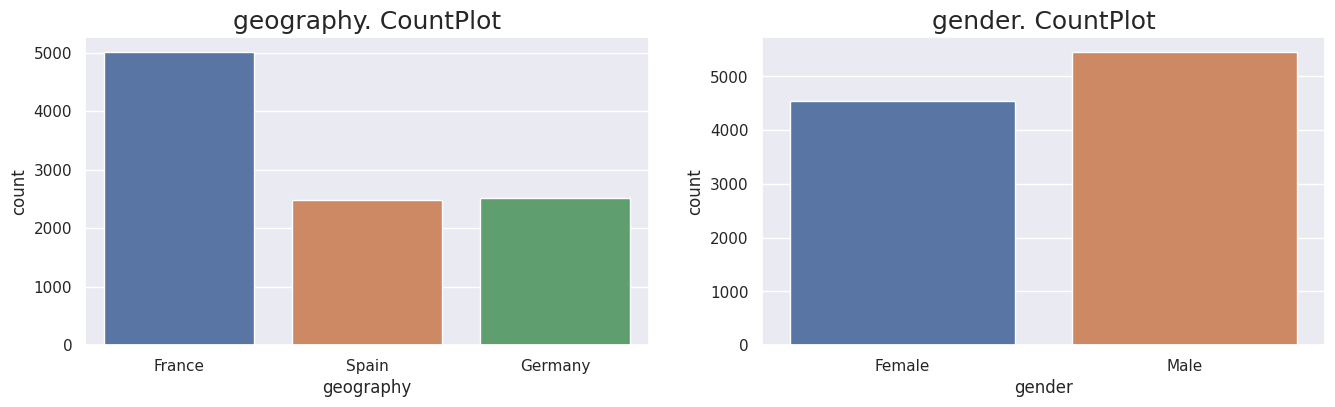

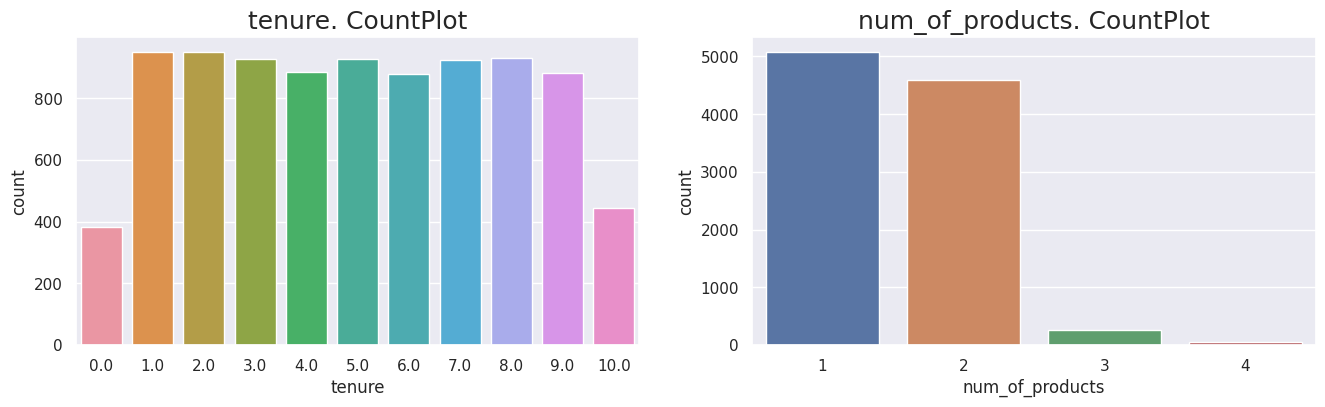

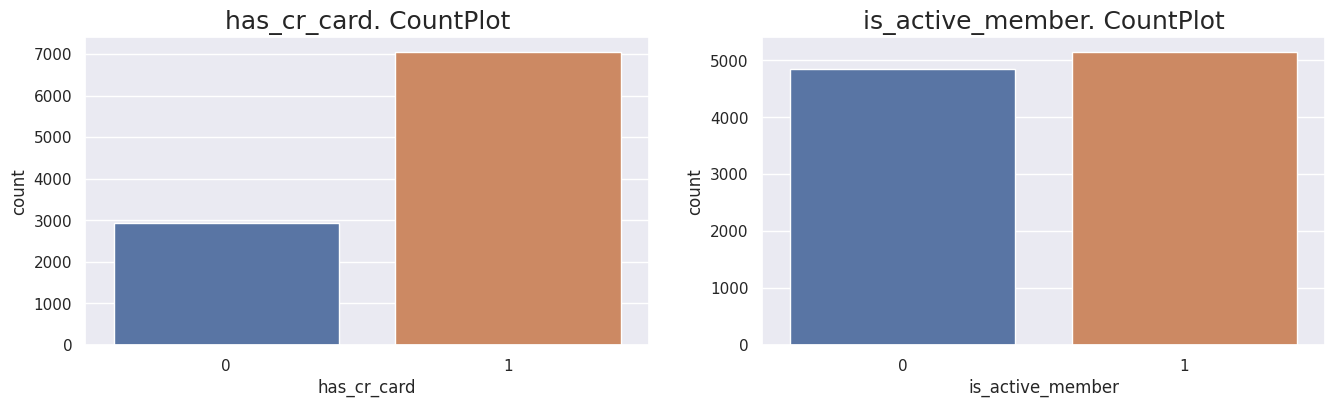

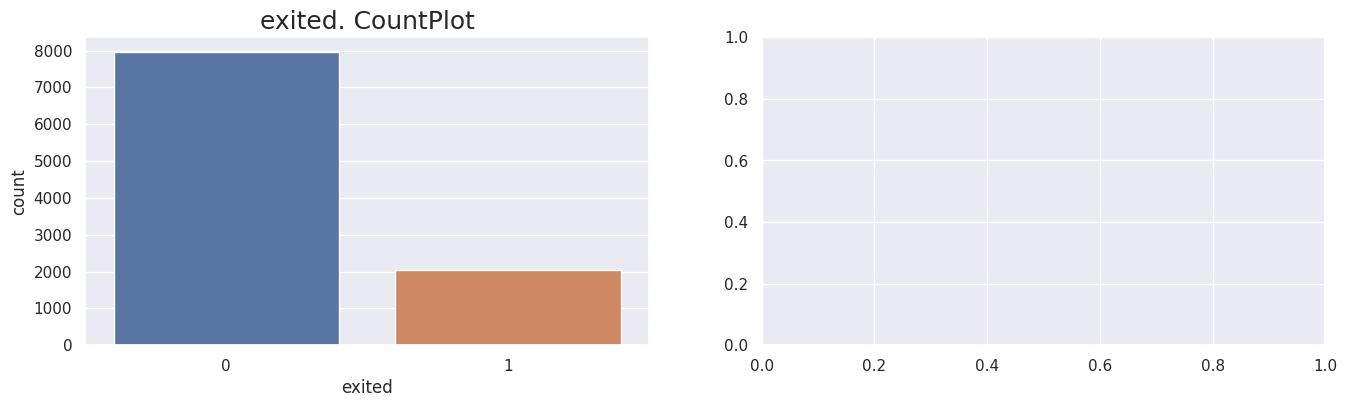

In [9]:
# функция для построения countplot по 2 признакам
def show_hists(data, data_label1, data_label2=''):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label1 + ". CountPlot", fontsize=18)
    sns.countplot(data=data, x=data_label1, ax=axes[0])
    if data_label2 != '':
        axes[1].set_title(data_label2 + ". CountPlot", fontsize=18)
        sns.countplot(data=data, x=data_label2, ax=axes[1])
    plt.show()

# построим графики для наших категориальных признаков
categoricals = ['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member', 'exited', '']
for i in range(len(categoricals)//2):
    show_hists(df, categoricals[2*i], categoricals[2*i+1])

> Целевой признак exited распределён примерно 4:1.

### Обработка пропусков

In [10]:
print('К-во пропусков в признаке tenure: ', df['tenure'].isnull().sum())

К-во пропусков в признаке tenure:  909


In [11]:
# посмотрим на распределение признака tenure
tenure = df['tenure'].value_counts().to_frame()
tenure.reset_index(inplace=True)
tenure.columns = ['tenure_cnt', 'count']
tenure

,tenure_cnt,count
0,1.0,952
1,2.0,950
2,8.0,933
3,3.0,928
4,5.0,927
5,7.0,925
6,4.0,885
7,9.0,882
8,6.0,881
9,10.0,446


In [12]:
fig = go.Figure([go.Bar(x = tenure['tenure_cnt'], y=tenure['count'])])
fig.update_layout(height = 450, showlegend = False, title_text = "Распределение признака tenure")
fig.show()

> Из графика видно, что клиентов, которые пользуются банком либо 10 лет, либо 0 лет, меньше, возможно, пропущенные значения - в основном у таких клиентов.
>
> Прежде, чем заполнять или удалять строки, проверим взаимосвязь данных:

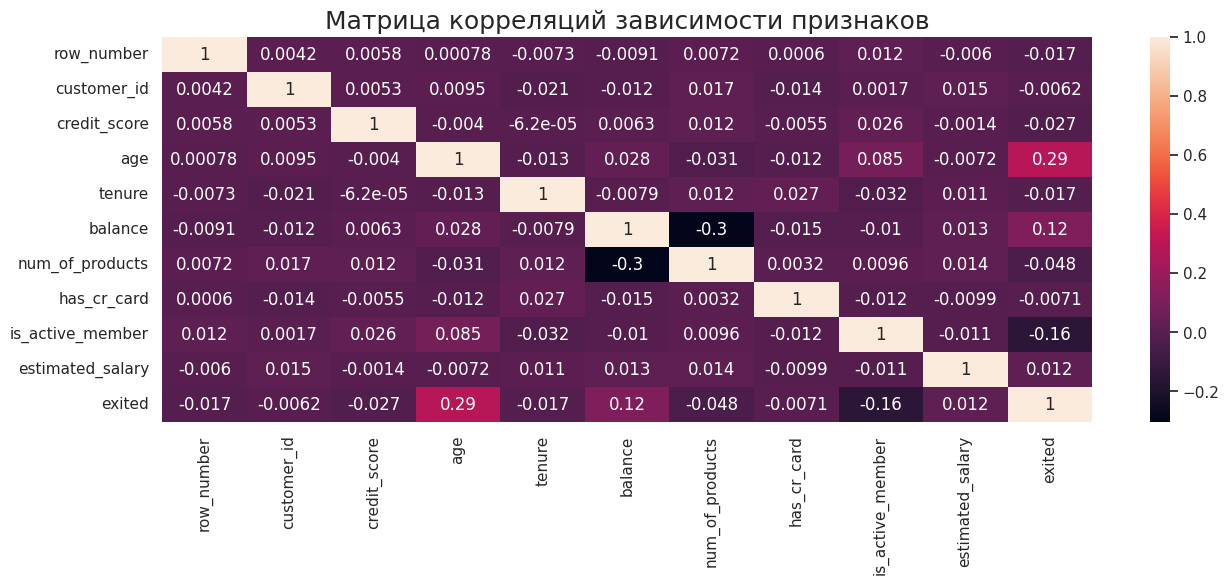

In [13]:
# проверим корреляцию Пирсона между параметрами:
plt.figure(figsize=(15, 5))
plt.title('Матрица корреляций зависимости признаков', fontsize=18)
sns.heatmap(df.corr(), annot = True)
plt.show();

> При таких коэффициентах корреляция очень низкая, и признаки особо не зависят друг от друга.
>
> Видим, что больше всего коррелирует с exited такие признаки, как возраст и баланс. Что показывает нам, что чем старше человек, тем больше exited, а точнее 1. Так же и с балансом.
>
> С активностью можем наблюдать небольшую отрицательную корреляцию, т.е. если человек не активен, то уйдет. Вполне логично.
>
> Так же видим, отрицательную корреляцию между балансом и колличеством продуктов. Чем больше у человека продуктов банка, тем ниже его баланс.
>
> Так как, чем больше значений, тем модель лучше всего себя показывает (больше данных для обучения), то попробуем заполнить пропуски в столбце tenure значениями.
>
> Особой корреляции между остальнымит параметрами и tenure нет (менее 0,1), то заполним данные медианным значением и проверим полученную корреляцию с остальными параметрами снова:

In [14]:
# создаём новый датасет и заполняем его значениями
data_filled = df
data_filled['tenure'] = data_filled['tenure'].fillna(data_filled['tenure'].median())

# проверяем количество значений
data_filled['tenure'].value_counts().sort_values(ascending=False)

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: tenure, dtype: int64

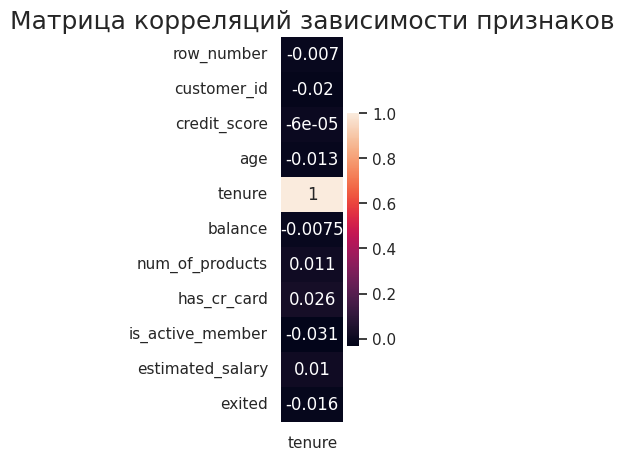

In [15]:
# построим хитмэп коррелляции:
plt.figure(figsize=(1, 5))
plt.title('Матрица корреляций зависимости признаков', fontsize=18)
sns.heatmap(data_filled.corr()[['tenure']], annot = True)
plt.show();

> Значения коэффициента Пирсона значительно не изменились, можно заменить датасет на новый:

In [16]:
df = data_filled
df['tenure'] = df['tenure'].astype('int')
df[['tenure']].dtypes

tenure    int64
dtype: object

## Подготовка данных к обучению

### Кодировка данных
Признаки 'RowNumber', 'CustomerId', 'Surname' не несут в себе информации, необходимой для дальнейшей классификации. Удалим их.

In [17]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# для того, чтобы преобразовать категориальные признаки в численные, вызовем функцию get_dummies()
# с аргументом drop_first. Такой подход позволит не попасть в дамми-ловушку.
data_ohe = pd.get_dummies(df, drop_first=True)
data_ohe = data_ohe.rename(columns = {'geography_Germany': 'geography_germany',
                                  'geography_Spain': 'geography_spain',
                                  'gender_Male': 'gender_male'}, inplace = False)
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
data_ohe.dtypes

credit_score           int64
age                    int64
tenure                 int64
balance              float64
num_of_products        int64
has_cr_card            int64
is_active_member       int64
estimated_salary     float64
exited                 int64
geography_germany      uint8
geography_spain        uint8
gender_male            uint8
dtype: object

### Разбиение данных на выборки

In [20]:
# выделим целевой признак
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)
# разделим исходные данные на три выборки: обучающую, валидационную и тестовую
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target,
                                                                              train_size=0.60,
                                                                              test_size=0.40,
                                                                              random_state=12345,
                                                                              stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid,
                                                                            target_valid,
                                                                            train_size=0.50,
                                                                            test_size=0.50,
                                                                            random_state=12345,
                                                                            stratify=target_valid)
samples = {'Размер обучающей выборки' : features_train,
          'Размер валидационной выборки': features_valid,
          'Размер тестовой выборки': features_test}

for key, value in samples.items():
    print(key + ':', value.shape)

Размер обучающей выборки: (6000, 11)
Размер валидационной выборки: (2000, 11)
Размер тестовой выборки: (2000, 11)


### Масштабирование признаков
Ранее мы отметили, что масштаб признаков очень сильно отличается. Это отрицательно повлияет на работу будущей модели (алгоритм может решить, что признак с более высокими значениями более важен чем другие признаки), поэтому признаки необходимо масштабировать.

In [21]:
# приведем признаки к одному масштабу
# для этого будем использовать структуру для стандартизации данных из библиотеке sklearn — StandardScaler
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# обучаем стандартизацию и преобразуем обучающую, валидационную и тестовую выборки
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,1,0,0.113236,0,0,0


### Выводы:
1. Изучили данные и сделали предобработку данных (заменили тип данных и заполнили пропуски для признака tenure, проверили данные на дубликаты и переименовали признаки).
2. Удалили признаки 'RowNumber', 'CustomerId', 'Surname', которые не несут в себе информации, необходимой для дальнейшей классификации.
3. Преобразовали категориальные признаки 'geography', 'gender' в численные.
4. Разделили исходные данные на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1.
5. Масштабировали следующие признаки: 'credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary'.

## Исследование задачи
В рамках проекта нам необходимо решить задачу бинарной классификации: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Обучим разные модели без учёта дисбаланса. Рассмотрим следующие модели классификации:

1. дерево принятия решений (Decision Tree Classifier)
2. случайный лес (Random Forest Classifier)
3. логистическая регрессия (Logistic Regression).

In [22]:
values = data_ohe['exited'].value_counts()
values = values.to_frame().reset_index()
values.columns = ['Boolean', 'Count']
values['Percentage'] = data_ohe['exited'].value_counts(normalize=True)
pd.DataFrame(values)
values

,Boolean,Count,Percentage
0,0,7963,0.7963
1,1,2037,0.2037


In [23]:
def visualize_class_balance(x, y, values, labels):

    '''

    Функция для визуализации баланса классов (в абсолютных величинах и в процентах).

    '''

    fig = make_subplots(rows = 1, cols = 2,
                    specs = [[{"type": "bar"}, {"type": "pie"}]],
                    subplot_titles = ('Доля клиентов, в зависимости от класса',
                                    'Доля клиентов, в зависимости от класса'))

    fig.add_trace(go.Bar(x = x, y = y), row = 1, col = 1)
    fig.add_trace(go.Pie(values = values, labels = labels), row = 1, col = 2)

    fig.update_layout(height = 400, showlegend = False, title_text = "Факт ухода клиента, где 1-ушел, 0-остался")
    fig.show()

visualize_class_balance(values['Boolean'], values['Count'], values['Percentage'], values['Boolean'])

В выборке представлены клиенты, где 79.6% - остались с банком, а 20.4% ушли от банка, что говорит нам о том, что данные довольно несбалансированы. И целевой признак распределён в сооотношении 4:1.

**Обучим разные модели без учёта дисбаланса.** Так как нам предстоит решить задачу бинарной классификации, рассмотрим следующие модели классификации:

1. дерево принятия решений (Decision Tree Classifier)
2. случайный лес (Random Forest Classifier)
3. логистическая регрессия (Logistic Regression)

### Дерево принятия решений (Decision Tree Classifier)
При использовании автоматических подборов параметров GridSearchCV модели очень долго обучались, от 25 минут до часа времени. Для ускорения процесса, использовался ручной подбор параметров.

In [25]:
def decision_tree_classifier(features_train, features_valid, target_train, target_valid, cw=None):
    """
    input: features_train, features_valid, target_train, target_valid
    - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели решающего дерева
    output: None
    description: функция обучает модель решающего дерева DecisionTreeClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_optios_dtc и best_f1 будем хранить наилучшие параметры для модели
    # и наивысшую f1 метрику соответственно
    best_options_dtc = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_options_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for max_depth in range(2,10):
        for min_samples_split in range(2,6):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    # инициация модели с текущими гиперпараметрами
                    model_dtc = DecisionTreeClassifier(random_state=12345,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion,
                                                          class_weight=cw)
                    # обучение модели на тренировочной выборке
                    model_dtc.fit(features_train, target_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions_dtc = model_dtc.predict(features_valid)
                    probabilities_dtc = model_dtc.predict_proba(features_valid)
                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(target_valid, predictions_dtc)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения,
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_options_dtc = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(target_valid, probabilities_dtc[:,1])
                    if roc_auc > best_roc_auc:
                        best_options_roc_auc = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_roc_auc = roc_auc

    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} \n'''.format(round(best_f1, 3),
                                 best_options_dtc[0],
                                 best_options_dtc[1],
                                 best_options_dtc[2],
                                 best_options_dtc[3]
                                ))

    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} '''.format(round(best_roc_auc, 3),
                                 best_options_roc_auc[0],
                                 best_options_roc_auc[1],
                                 best_options_roc_auc[2],
                                 best_options_roc_auc[3]
                                ))

    print()
    # для метрики качества воспользуемся функцией classification_report,
    # которая выведет все необходимые метрики классификации
    report = classification_report(target_valid, predictions_dtc, target_names=['non-exited', 'exited'], output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)

In [26]:
%%time
decision_tree_classifier(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.603
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 6
       criterion = entropy 

Наилучшая метрика roc_auc: 0.859
    Парамтеры модели:
       max_depth = 7
       min_samples_split = 2
       min_samples_leaf = 6
       criterion = entropy 

              precision    recall  f1-score    support
non-exited     0.878999  0.949121  0.912715  1592.0000
exited         0.711744  0.490196  0.580552   408.0000
accuracy       0.855500  0.855500  0.855500     0.8555
macro avg      0.795372  0.719658  0.746633  2000.0000
weighted avg   0.844879  0.855500  0.844954  2000.0000
CPU times: user 17 s, sys: 0 ns, total: 17 s
Wall time: 18.4 s


> - Наилучшая метрика f1 для решающего дерева 0.60 (достаточно по техническому заданию).
- Наилучшая метрика roc_auc для решающего дерева 0.86.
- Наилучший результат по метрикам f1 и roc_auc достигается при разной настройке max_depth.
- Попробуем улучшить результат на других моделях.

### Случайный лес

In [27]:
def random_forest_classifier(features_train, features_valid, target_train, target_valid, cw=None):
    """
    input: features_train, features_valid, target_train, target_valid
    - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели случайного леса
    output: None
    description: функция обучает модель решающего дерева RandomForestClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_options_rfc и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_options_rfc = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_options_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for n_estimators in range(30,40):
        for max_depth in range(10,17,2):
            for min_samples_split in range(2,5):
                for min_samples_leaf in range(1,4):
                    # инициация модели с текущими гиперпараметрами
                    model_rfc = RandomForestClassifier(random_state=12345,
                                                       n_estimators=n_estimators,
                                                       max_depth=max_depth,
                                                       min_samples_split=min_samples_split,
                                                       min_samples_leaf=min_samples_leaf,
                                                       class_weight=cw)
                    # обучение модели на тренировочной выборке
                    model_rfc.fit(features_train, target_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions_rfc = model_rfc.predict(features_valid)
                    probabilities_rfc = model_rfc.predict_proba(features_valid)
                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(target_valid, predictions_rfc)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения,
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_options_rfc = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(target_valid, probabilities_rfc[:,1])
                    if roc_auc > best_roc_auc:
                        best_options_roc_auc = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_roc_auc = roc_auc

    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       n_estimators = {}
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {} \n'''.format(round(best_f1, 3),
                                 best_options_rfc[0],
                                 best_options_rfc[1],
                                 best_options_rfc[2],
                                 best_options_rfc[3]
                                ))

    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       n_estimators = {}
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {} '''.format(round(best_roc_auc, 3),
                                 best_options_roc_auc[0],
                                 best_options_roc_auc[1],
                                 best_options_roc_auc[2],
                                 best_options_roc_auc[3]
                                ))
    print()
    # для метрики качества воспользуемся функцией classification_report,
    # которая выведет все необходимые метрики классификации
    report = classification_report(target_valid, predictions_rfc, target_names=['non-exited', 'exited'], output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)

In [28]:
%%time
random_forest_classifier(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.618
    Парамтеры модели:
       n_estimators = 39
       max_depth = 12
       min_samples_split = 2
       min_samples_leaf = 3 

Наилучшая метрика roc_auc: 0.875
    Парамтеры модели:
       n_estimators = 34
       max_depth = 10
       min_samples_split = 4
       min_samples_leaf = 1 

              precision    recall  f1-score    support
non-exited     0.881677  0.964196  0.921092  1592.0000
exited         0.779923  0.495098  0.605697   408.0000
accuracy       0.868500  0.868500  0.868500     0.8685
macro avg      0.830800  0.729647  0.763395  2000.0000
weighted avg   0.860919  0.868500  0.856752  2000.0000
CPU times: user 2min 13s, sys: 307 ms, total: 2min 14s
Wall time: 2min 22s


> - Наилучшая метрика f1 для случайного леса 0.61 (достаточно по техническому заданию).
- Наилучшая метрика roc_auc для случайного леса 0.87.
- Наилучший результат по метрикам f1 и roc_auc достигается при разных настройках гиперпараметров.
- Посмотрим на результат на логистической регрессии.

### Логистическая регрессия
Выделим гиперпараметры для настройки модели:

- С - инверсия силы регуляризации
- Критерием проверки качества модели будет f1 и roc_auc.

In [29]:
def logistic_regression(features_train, features_valid, target_train, target_valid, cw=None):
    # в параметрах best_options_lr и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_options_lr = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_options_roc_auc = []
    best_roc_auc = 0.5

    #cs = np.linspace(0.01, 100, 1000, endpoint=True)
    cs = range(1, 100)
    # проходим в циклах по всем выбранным гиперпараметрам
    for C in cs:
        # инициация модели с текущими гиперпараметрами
        model_lr = LogisticRegression(random_state=12345,
                                      solver='liblinear',
                                      C=C,
                                      max_iter=1000,
                                      class_weight=cw)
        # обучение модели на тренировочной выборке
        model_lr.fit(features_train, target_train)
        # поиск предсказаний модели на валидационной выбоке
        predictions_lr = model_lr.predict(features_valid)
        probabilities_lr = model_lr.predict_proba(features_valid)
        # вычисление f1 модели методом f1_score
        f1 = f1_score(target_valid, predictions_lr)
        # если текущее значение метрики f1 выше предыдущего лучшего значения,
        # сохраняем параметры модели и текущую метрику f1
        if f1 > best_f1:
            best_options_lr = [C]
            best_f1 = f1
        # аналогично для метрики roc_auc
        roc_auc = roc_auc_score(target_valid, probabilities_lr[:,1])
        if roc_auc > best_roc_auc:
            best_options_roc_auc = [C]
            best_roc_auc = roc_auc
    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       C = {} '''.format(round(best_f1, 3),
                             best_options_lr[0]
                            ))
    print()
    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       C = {} '''.format(round(best_roc_auc, 3),
                             best_options_roc_auc[0]
                            ))

In [30]:
%%time
logistic_regression(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.311
    Парамтеры модели:
       C = 2 

Наилучшая метрика roc_auc: 0.788
    Парамтеры модели:
       C = 1 
CPU times: user 3.87 s, sys: 2.45 s, total: 6.32 s
Wall time: 7.43 s


> - Наилучшая метрика f1 для логистической регрессии 0.31 (хуже, чем на остальных моделях).
- Наилучшая метрика roc_auc для логистической регрессии 0.78.
- Наилучший результат по метрикам f1 и roc_auc достигается при разных настройках гиперпараметров.

### Выводы:
1. Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно.
2. Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов.
3. Максимальное значение метрики f1 = 0.61 получено при обучении модели "Случайного леса". Качество модели удовлетворяет условию технического задания.
4. Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.87 достигнуто при обучении модели "Случайного леса".
5. Метрики f1 и roc_auc достигли максимальных значений при разных настройках гиперпараметров. Очевидно, теперь наша задача подобрать одинаковые настройки гипертпараметров для достижения оптимальных показателей метрик f1 и roc_auc.

## Борьба с дисбалансом
Существует несколько способов борьбы с дисбалансом, в рамках этого проекта будем применять следующие:

1. взвешивание классов (объектам редкого класса придается больший вес)
2. увеличение выборки (upsampling)
3. уменьшение выборки (downsampling).

### Взвешивание классов

In [31]:
decision_tree_classifier(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика f1: 0.617
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 7
       criterion = entropy 

Наилучшая метрика roc_auc: 0.861
    Парамтеры модели:
       max_depth = 7
       min_samples_split = 2
       min_samples_leaf = 7
       criterion = entropy 

              precision    recall  f1-score   support
non-exited     0.931571  0.752513  0.832523  1592.000
exited         0.448179  0.784314  0.570410   408.000
accuracy       0.759000  0.759000  0.759000     0.759
macro avg      0.689875  0.768413  0.701466  2000.000
weighted avg   0.832959  0.759000  0.779052  2000.000


In [32]:
random_forest_classifier(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика f1: 0.652
    Парамтеры модели:
       n_estimators = 39
       max_depth = 10
       min_samples_split = 2
       min_samples_leaf = 2 

Наилучшая метрика roc_auc: 0.871
    Парамтеры модели:
       n_estimators = 38
       max_depth = 10
       min_samples_split = 2
       min_samples_leaf = 1 

              precision    recall  f1-score    support
non-exited     0.898959  0.922111  0.910388  1592.0000
exited         0.662125  0.595588  0.627097   408.0000
accuracy       0.855500  0.855500  0.855500     0.8555
macro avg      0.780542  0.758849  0.768742  2000.0000
weighted avg   0.850645  0.855500  0.852596  2000.0000


In [33]:
logistic_regression(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика f1: 0.529
    Парамтеры модели:
       C = 1 

Наилучшая метрика roc_auc: 0.794
    Парамтеры модели:
       C = 1 


> - Взвешивание классов дало значительный прирост в метрике f1 на модели "Логистическая регрессия" с 0.31 до 0.53.
- Взвешивание классов дало незначительный прирост в метрике f1 на моделях "Решающего дерева" и "Случайного леса".
- Также стоит отметить, что в данном случае наилучшие значения метрик f1 и roc_auc достигаются при различных настройках гиперпараметров.
- Применим upsampling и downsampling. Проверим результаты на моделях "Решающего дерева", "Случайного леса" (они дали наилучший результат при начальных исследованиях) и модели "Логистическая регрессия" (возможно удастся довести метрику f1 до показателя, требуемого по техническому заданию).

### Увеличение выборки (upsampling)
Преобразуем объекты редкого класса так, чтобы они стали не такими редкими.

Преобразование проходит в несколько этапов:

- разделяем обучающую выборку на отрицательные и положительные объекты;
- копируем несколько раз положительные объекты;
- создаем новую обучающую выборку с учётом полученных данных;
перемешиваем данные.

In [34]:
def upsample(features, target, repeat):
    """
    input:        features - признаки
                  target - целево признак
                  repeat (int) - множитель для повторения признаков
    output:       features_upsampled - увеличенная выборка признаков
                  target_upsampled - увеличенная выборка целевого признака
    description:  функция разделяет признаки по классам целевого признака (0, 1),
                  повторяет признаки целевого положительного класса repeat раз,
                  объединяет объекты с разными целевыми признаками методом concat,
                  перемешивает объекты методом shuffle
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [35]:
# увеличим выборку в 4 раза,
# так как 20% клиентов уходят из банка (чтобы значения были приблизительно равны):
# выведем на экран размеры новых выборок
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(features_upsampled.shape)
print(target_upsampled.shape)

(9666, 11)
(9666,)


In [36]:
values = target_upsampled.value_counts()
values = values.to_frame().reset_index()
values.columns = ['Boolean', 'Count']
values['Percentage'] = values['Count'] / sum(values['Count'])
pd.DataFrame(values)
values

visualize_class_balance(values['Boolean'], values['Count'], values['Percentage'], values['Boolean'])

In [37]:
# обучим модели случайного леса и решающего дерева на сбалансированных обучающих выборках
decision_tree_classifier(features_upsampled, features_valid, target_upsampled, target_valid)

Наилучшая метрика f1: 0.591
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 7
       criterion = entropy 

Наилучшая метрика roc_auc: 0.851
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = entropy 

              precision    recall  f1-score    support
non-exited     0.923254  0.755653  0.831088  1592.0000
exited         0.441894  0.754902  0.557466   408.0000
accuracy       0.755500  0.755500  0.755500     0.7555
macro avg      0.682574  0.755278  0.694277  2000.0000
weighted avg   0.825057  0.755500  0.775269  2000.0000


In [38]:
random_forest_classifier(features_upsampled, features_valid, target_upsampled, target_valid)

Наилучшая метрика f1: 0.653
    Парамтеры модели:
       n_estimators = 37
       max_depth = 10
       min_samples_split = 2
       min_samples_leaf = 1 

Наилучшая метрика roc_auc: 0.872
    Парамтеры модели:
       n_estimators = 32
       max_depth = 12
       min_samples_split = 2
       min_samples_leaf = 2 

              precision    recall  f1-score   support
non-exited     0.911239  0.896357  0.903737  1592.000
exited         0.619816  0.659314  0.638955   408.000
accuracy       0.848000  0.848000  0.848000     0.848
macro avg      0.765527  0.777835  0.771346  2000.000
weighted avg   0.851789  0.848000  0.849721  2000.000


In [39]:
# обучим модель логистической регрессии на сбалансированных обучающих выборках
# интересно, сможим ли мы довести метрику f1 до показателя, требуемого по техническому заданию
logistic_regression(features_upsampled, features_valid, target_upsampled, target_valid)

Наилучшая метрика f1: 0.525
    Парамтеры модели:
       C = 1 

Наилучшая метрика roc_auc: 0.794
    Парамтеры модели:
       C = 1 


### Уменьшение выборки (downsampling)

In [40]:
def downsample(features, target, fraction):
    """
    input:        features - признаки
                  target - целево признак
                  fraction (float) - доля объектов для сэмплирования
    output:       features_downsampled - уменьшенная выборка признаков
                  target_downsampled - уменьшенная выборка целевого признака
    description:  функция разделяет признаки по классам целевого признака (0, 1),
                  сэмплирует признаки целевого класса 0 (с коэффициентом fraction),
                  объединяет объекты с разными целевыми признаками методом concat,
                  перемешивает объекты методом shuffle
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [41]:
# уменьшим количество объектов класса 0 в 0.25 раза
# выведем на экран размеры новых выборок
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print(features_downsampled.shape)
print(target_downsampled.shape)

(2416, 11)
(2416,)


In [42]:
values = target_downsampled.value_counts()
values = values.to_frame().reset_index()
values.columns = ['Boolean', 'Count']
values['Percentage'] = values['Count'] / sum(values['Count'])
pd.DataFrame(values)
values

visualize_class_balance(values['Boolean'], values['Count'], values['Percentage'], values['Boolean'])

In [43]:
%%time
# обучим модели случайного леса и решающего дерева на сбалансированных обучающих выборках
decision_tree_classifier(features_downsampled, features_valid, target_downsampled, target_valid)

Наилучшая метрика f1: 0.596
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 3
       criterion = gini 

Наилучшая метрика roc_auc: 0.856
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 3
       criterion = entropy 

              precision    recall  f1-score   support
non-exited     0.935759  0.759422  0.838419  1592.000
exited         0.459040  0.796569  0.582437   408.000
accuracy       0.767000  0.767000  0.767000     0.767
macro avg      0.697399  0.777995  0.710428  2000.000
weighted avg   0.838508  0.767000  0.786199  2000.000
CPU times: user 10.4 s, sys: 19.2 ms, total: 10.5 s
Wall time: 13 s


In [44]:
%%time
random_forest_classifier(features_downsampled, features_valid, target_downsampled, target_valid)

Наилучшая метрика f1: 0.624
    Парамтеры модели:
       n_estimators = 36
       max_depth = 10
       min_samples_split = 2
       min_samples_leaf = 2 

Наилучшая метрика roc_auc: 0.866
    Парамтеры модели:
       n_estimators = 39
       max_depth = 14
       min_samples_split = 3
       min_samples_leaf = 1 

              precision    recall  f1-score    support
non-exited     0.938392  0.784548  0.854601  1592.0000
exited         0.487294  0.799020  0.605385   408.0000
accuracy       0.787500  0.787500  0.787500     0.7875
macro avg      0.712843  0.791784  0.729993  2000.0000
weighted avg   0.846368  0.787500  0.803761  2000.0000
CPU times: user 1min 21s, sys: 259 ms, total: 1min 21s
Wall time: 1min 38s


In [45]:
# обучим модель логистической регрессии на сбалансированных обучающих выборках
# интересно, сможим ли мы довести метрику f1 до показателя, требуемого по техническому заданию
logistic_regression(features_downsampled, features_valid, target_downsampled, target_valid)

Наилучшая метрика f1: 0.528
    Парамтеры модели:
       C = 1 

Наилучшая метрика roc_auc: 0.793
    Парамтеры модели:
       C = 1 


> - Метрика f1 для модели "Случайный лес" достигла значения 0.62 на сбалансированной выборке, что удовлетворяет условию технического задания (>0.59).
- Для модели "Решающее дерево" метрика f1 также достигла минимально допустимого значения 0.59 (за меньшее время обучения).
- Наилучшие значения метрик f1 и roc_auc модели достигли при различных значениях гиперпараметров.
- Для модели "Случайный лес" попробуем применить различные варианты upsampling и downsampling (изменять параметры repeat и fraction).

In [46]:
for rep in range(2,4):
    for frac in np.arange(0.5, 0.8, 0.05):
        print('=============================================================')
        print('repeat = {};   fraction = {}'.format(rep, round(frac,2)))
        features_upsampled, target_upsampled = upsample(features_train, target_train, rep)
        features_downsampled, target_downsampled = downsample(features_upsampled, target_upsampled, frac)
        random_forest_classifier(features_downsampled, features_valid, target_downsampled, target_valid)

repeat = 2;   fraction = 0.5
Наилучшая метрика f1: 0.642
    Парамтеры модели:
       n_estimators = 30
       max_depth = 14
       min_samples_split = 2
       min_samples_leaf = 2 

Наилучшая метрика roc_auc: 0.874
    Парамтеры модели:
       n_estimators = 30
       max_depth = 10
       min_samples_split = 2
       min_samples_leaf = 2 

              precision    recall  f1-score    support
non-exited     0.925086  0.845477  0.883492  1592.0000
exited         0.548624  0.732843  0.627492   408.0000
accuracy       0.822500  0.822500  0.822500     0.8225
macro avg      0.736855  0.789160  0.755492  2000.0000
weighted avg   0.848288  0.822500  0.831268  2000.0000
repeat = 2;   fraction = 0.55
Наилучшая метрика f1: 0.646
    Парамтеры модели:
       n_estimators = 31
       max_depth = 14
       min_samples_split = 2
       min_samples_leaf = 2 

Наилучшая метрика roc_auc: 0.871
    Парамтеры модели:
       n_estimators = 38
       max_depth = 10
       min_samples_split = 4
       

### Выводы:
<ol>
    <li>Применили несколько способов борьбы с дисбалансом (взвешивание классов, увеличение выборки, уменьшение выборки) и проверили, как преобразование данных влияет на способность модели предсказывать уход клиентов.</li>
    <ul>
        <li>Взвешивание классов с помощью параметра class_weight дало значительное увеличение на 0,22 метрики f1 для модели "Логистическая регрессия".</li>
        <li>Для моделей "Дерево принятия решений" и "Случайного леса" взвешивание классов также дало незначительный прирост метрик f1 и roc_auc.</li>
        <li>При upsampling положительного класса и downsampling отрицательного класса метрики f1 и roc_auc моделей "Дерево принятия решений" и "Случайного леса" достигли уровня f1, требуемого по техническому заданию.</li>
        <li>Следует отметить, что при взвешивании классов модель "Дерево принятия решений" достигла больших результатов (f1=0.62, roc_auc=0.86), чем после увеличения количества объектов класса 1 в 4 раза (f1=0.59, roc_auc=0.85) и уменьшения количества объектов класса 0 в 0.25 раз (f1=0.596, roc_auc=0.856) </li>
    </ul>
    <li>Необходимое качество на валидационной выборке получили модели:</li>
    <ul>
        <li>Случайный лес:</li>
        <ul>
            <li>f1 = 0.596</li>
            <li>roc_auc = 0.856</li>
            <li>repeat = 4 - повторение объектов класса 1</li>
            <li>fraction = 0.25 - коэффициент сэмплирования объектов класса 0</li>
        </ul>
        <li>Решающее дерево:</li>
        <ul>
            <li>f1 = 0.624</li>
            <li>roc_auc = 0.86</li>
            <li>repeat = 4</li>
            <li>fraction = 0.25</li>
        </ul>
    </ul>
    <li>Выяснили, что наилучший результат для модели "Случайного леса" достигнут при увеличении положительного класса тренировочной выборки в 3 раза и сэмплировании отрицательного класса с коэффициентом 0.75. При этом метрика f1 = 0.65 а roc_auc = 0.87 при одинаковых настройках гиперпараметров, что удовлетворяет условиям технического задания.</li>
    <li>Протестируем модель "Cлучайного леса" с следующими гиперпараметрами на тестовой выборке:</li>
    <ul>
        <li>n_estimators = 39</li>
        <li>max_depth = 10</li>
        <li>min_samples_split = 2</li>
        <li>min_samples_leaf = 2</li>
    </ul>
</ol>

## Тестирование модели

In [47]:
# проверим работу модели на расширенной выборке:
# объединим тренировочную и валидационную выборки
features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])
# увеличим положительный класс выборки в 3 раза
# и проведем сэмплирование отрицательного классса с коэффициентом 0.75
features_upsampled, target_upsampled = upsample(features_combined, target_combined, 3)
features_downsampled, target_downsampled = downsample(features_upsampled, target_upsampled, 0.75)
# инициация модели с подобранными гиперпараметрами
model_rfc_final = RandomForestClassifier(random_state=12345,
                                         n_estimators=39,
                                         max_depth=10,
                                         min_samples_split=2,
                                         min_samples_leaf=2)
# обучение модели на объединенной выборке
model_rfc_final.fit(features_downsampled, target_downsampled)
# поиск предсказаний модели на тестовой выбоке
predictions_final = model_rfc_final.predict(features_test)
probabilities_final = model_rfc_final.predict_proba(features_test)
# вычисление f1 модели методом f1_score
f1_final = f1_score(target_test, predictions_final)
# вычисление roc_auc модели методом roc_auc_score
roc_auc_final = roc_auc_score(target_test, predictions_final)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1_final,2), round(roc_auc_final,2)))

 f1 = 0.61, 
 roc_auc = 0.78


In [48]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_final[:,1])

# ROC-кривая случайного леса
trace_rf = go.Scatter(x = fpr,y = tpr,
                      name = "Случайный лес: " + str(roc_auc_final),
                      line = dict(width = 2))

# ROC-кривая случайной модели
trace_random = go.Scatter(x = [0.0, 1.0], y = [0.0, 1.0],
                          name = 'Случайная модель',
                          line = dict(width = 2, dash = 'dot'))

data = [trace_rf, trace_random]
layout = go.Layout(dict(title = 'ROC-кривая',
                        height = 550, width = 800,
                        xaxis = dict(title = "Ложноположительные ответы (False Positive Rate)"),
                        yaxis = dict(title = "Истинно положительные ответы (True Positive Rate)")))

fig = go.Figure(data, layout=layout)
fig.show()

In [49]:
# проверим финальную модель на адекватность
strategies = ['stratified', 'most_frequent', 'uniform']

dummy_results = []
for strategy in strategies:
    dc = DummyClassifier(strategy = strategy, random_state = 42)

    dc.fit(features_train, target_train)
    result = dc.score(features_test, target_test)
    dummy_results.append({strategy: result})

pd.DataFrame(dummy_results).style.highlight_max(color = 'lightblue', axis = 1)

,stratified,most_frequent,uniform
0,0.672000,nan,nan
1,nan,0.796500,nan
2,nan,nan,0.506500


> Видим, что модель "Случайного леса" с гиперпараметрами n_estimators = 39, max_depth = 10, min_samples_split = 2 и min_samples_leaf = 2 работает лучше, чем стратегии случайного прогнозирования классификатора DummyClassifier().

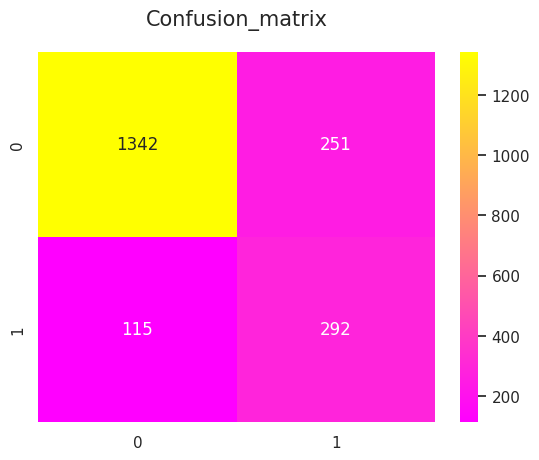

In [50]:
sns.heatmap(confusion_matrix(target_test, predictions_final),annot=True,fmt='3.0f',cmap="spring")
plt.title('Confusion_matrix', y=1.05, size=15);